<a href="https://colab.research.google.com/github/ronald0807/Running-python/blob/main/prac2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COMP2200/COMP6200 Prac 1

_Authors: Greg Baker (greg.baker@mq.edu.au)_

---

The City of Baltimore publishes data about all of its employees, including their salaries. And these annual salaries can differ from their gross pay: Perhaps an employee works nightshift/overtime and earns more than their official salary; perhaps they are only employed for a part of the year and earn less.

In this lab, we'll estimate what a typical city employee's gross pay will be based on their annual salary.

Remember that to use a notebook, you need to run each cell. If left side of a cell says `[ ]`, it hasn't been run. If the left side
says something like `[25]` then it has been. Shift-Enter runs a cell;  if you look around the user interface, various other menu items can run several cells in sequence.

**Note**

This prac will cover a very complete data science lifecycle. Unfortunately, this requires some skills that we don't know yet. So there are some blocks of code that do things which we haven't explained yet. That's OK. We'll get there.

Here are the steps we'll do:

- Data Acquisition -- there will be a little of coding for you here

- Data Cleaning and Preparation

- Training -- there will be a little bit here for you to do as well

- Validation -- lots to do here

- Evaluation -- lots to do here

# Data Acquisition

Don't worry too much about the following blocks of code. Over the next few weeks you'll get more comfortable with this, and you'll
see that a lot of data science programming work is simple and easy-to-repeat.

First up, let's load the libraries we need:

In [4]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import sklearn.linear_model
import sklearn.model_selection
import sklearn.metrics

The Baltimore salaries data set is available in `Baltimore_City_Employee_Salaries_2011.csv`. This is a file and needs to be in the same directory as this notebook. Column 0 is the name of the employee and we'll use it as an index. Column 4 is a date. (Note that we count columns starting with "0").

The pandas `read_csv` function reads it into a dataframe called `salaries`

In [5]:
salaries = pd.read_csv('Baltimore_City_Employee_Salaries_2011.csv',
                       index_col=0,
                      parse_dates=[4])
salaries.head()

,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
Name,,,,,,
"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,1979-10-24,$50845.00,$45505.94
"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,2006-09-25,$56595.00,$51588.89
"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,2009-07-23,$56500.00,$50633.26
"Abdal-Rahim,Naim A",EMT Firefighter,A64063,Fire Academy Recruits,2011-03-30,$33476.00,$3888.95
"Abdi,Ezekiel W",POLICE OFFICER,A99398,Police Department,2007-06-14,$50919.00,$51421.73


## Your Turn....

Last week you learned about the `.tail()` method to see the last few rows in a database. Use that now to look at
the end of the `salaries` dataframe.

In [6]:
salaries.tail()

,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
Name,,,,,,
"Lewis,Awanda S",SCHOOL HEALTH AIDE (10 MONTHS),A65104,HLTH-Health Department,2006-07-01,$23395.00,$21746.79
"Lewis,Bernard T",FIRE PUMP OPERATOR,A64120,Fire Department,1990-03-26,$61653.00,$59866.23
"Lewis,Brian C",POLICE OFFICER,A99322,Police Department,1998-04-20,$61672.00,$84219.58
"Lewis,Capri T",JTPA TRAINEE MOMR,W03T19,Youth Cust,2009-06-11,$15080.00,$1881.38
"Lewis,Carlos E",CARPENTER II,A50212,DPW-Water & Waste Water,1993-08-02,$34643.00,$29709.64


You can also use `.sample(5)` to get 5 random rows from the `salaries` dataframe.

In [7]:
salaries.sample(5)

,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
Name,,,,,,
"Fields,Nathan E",COMMUNITY HEALTH EDUCATOR III,A65026,HLTH-Health Department,2007-11-01,$45498.00,$47247.96
"Williams,Nathaniel",RECREATION LEADER I,A04001,R&P-Recreation,2007-06-28,$28875.00,$30050.70
"Headspeth,Lee",LABORER,A49504,TRANS-Highways,1997-09-06,$28891.00,$28180.99
"Dickens,Tai Alani C",DEPUTY SHERIFF,A38001,Sheriff's Office,2002-08-01,$45074.00,$48183.63
"Bianca,Gino",FIELD SURVEY SUPERVISOR,A49106,TRANS-Highways,2011-02-07,$51000.00,$12750.01


# Data Preprocessing

## Preprocess the Data (Convert Strings to Numbers)

The `AnnualSalary` and `GrossPay` columns are strings and start with a `$`. We'll have to strip this off and convert these columns to floats.

Don't worry too much about this code... just confirm that it works by checking that it now looks like a number without a `$` sign.

In [8]:
salaries.AnnualSalary = salaries.AnnualSalary.str.strip('$').astype(float)
salaries.GrossPay = salaries.GrossPay.str.strip('$').astype(float)
salaries.head()

,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
Name,,,,,,
"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,1979-10-24,50845.0,45505.94
"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,2006-09-25,56595.0,51588.89
"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,2009-07-23,56500.0,50633.26
"Abdal-Rahim,Naim A",EMT Firefighter,A64063,Fire Academy Recruits,2011-03-30,33476.0,3888.95
"Abdi,Ezekiel W",POLICE OFFICER,A99398,Police Department,2007-06-14,50919.0,51421.73


## Perform Exploratory Data Analysis

Create a scatterplot of annual salary versus gross pay.

<Axes: xlabel='AnnualSalary', ylabel='GrossPay'>

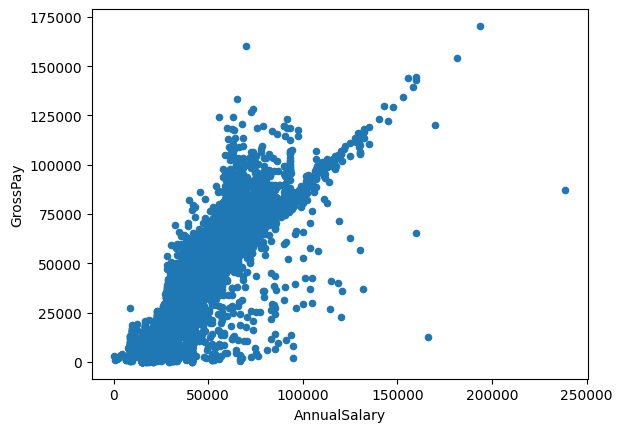

In [9]:
salaries.plot.scatter(x='AnnualSalary', y='GrossPay')

# Look for a Linear Relationship

It seems like there is a linear relationship in there, but it's obscured by a lot of noise.

Let's get a vibe for the data, and what we should expect to see in our machine generated model.

We will extract a tiny sample of it and do an approximation of the Theil-Sen algorithm by hand.

Note that because we are _sampling_ the data, everyone is going to get a different subset of the data here.

In [10]:
tiny_sample = salaries.sample(10)
tiny_sample

,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
Name,,,,,,
"Green,Kevin R",TRAFFIC ELECTRON MAINT TECH II,A49505,TRANS-Highways,1991-12-16,49027.0,69421.25
"Winkler,Bryan K",EMT Firefighter,A64157,Fire Department,2008-08-18,39853.0,39367.23
"Williams,Clinton D",Waste Water Opns Tech II Sanit,A50207,DPW-Water & Waste Water,2007-02-12,37511.0,31749.83
"Brunson,Kenneth L",DEPUTY SHERIFF (SPECIAL),A38005,Sheriff's Office,2001-09-13,41899.0,43313.12
"Reyes,Sarah P",SECRETARY II,A75056,Enoch Pratt Free Library,2007-07-30,31119.0,26580.66
"Lonon III,Leroy",LABORER,B70104,DPW-Solid Waste,2006-05-22,28059.0,25361.20
"Kroger,James L",CALL CENTER AGENT I,A40002,M-R Info Technology,2005-07-05,33841.0,32343.94
"Kemick,Sandra L",CHIEF STATE'S ATTORNEY,A29005,States Attorneys Office,1979-06-11,92200.0,80852.61
"Taylor,Douglas S",FIRE LIEUTENANT,A64143,Fire Department,1990-06-25,68717.0,73077.08


The next cell creates an image

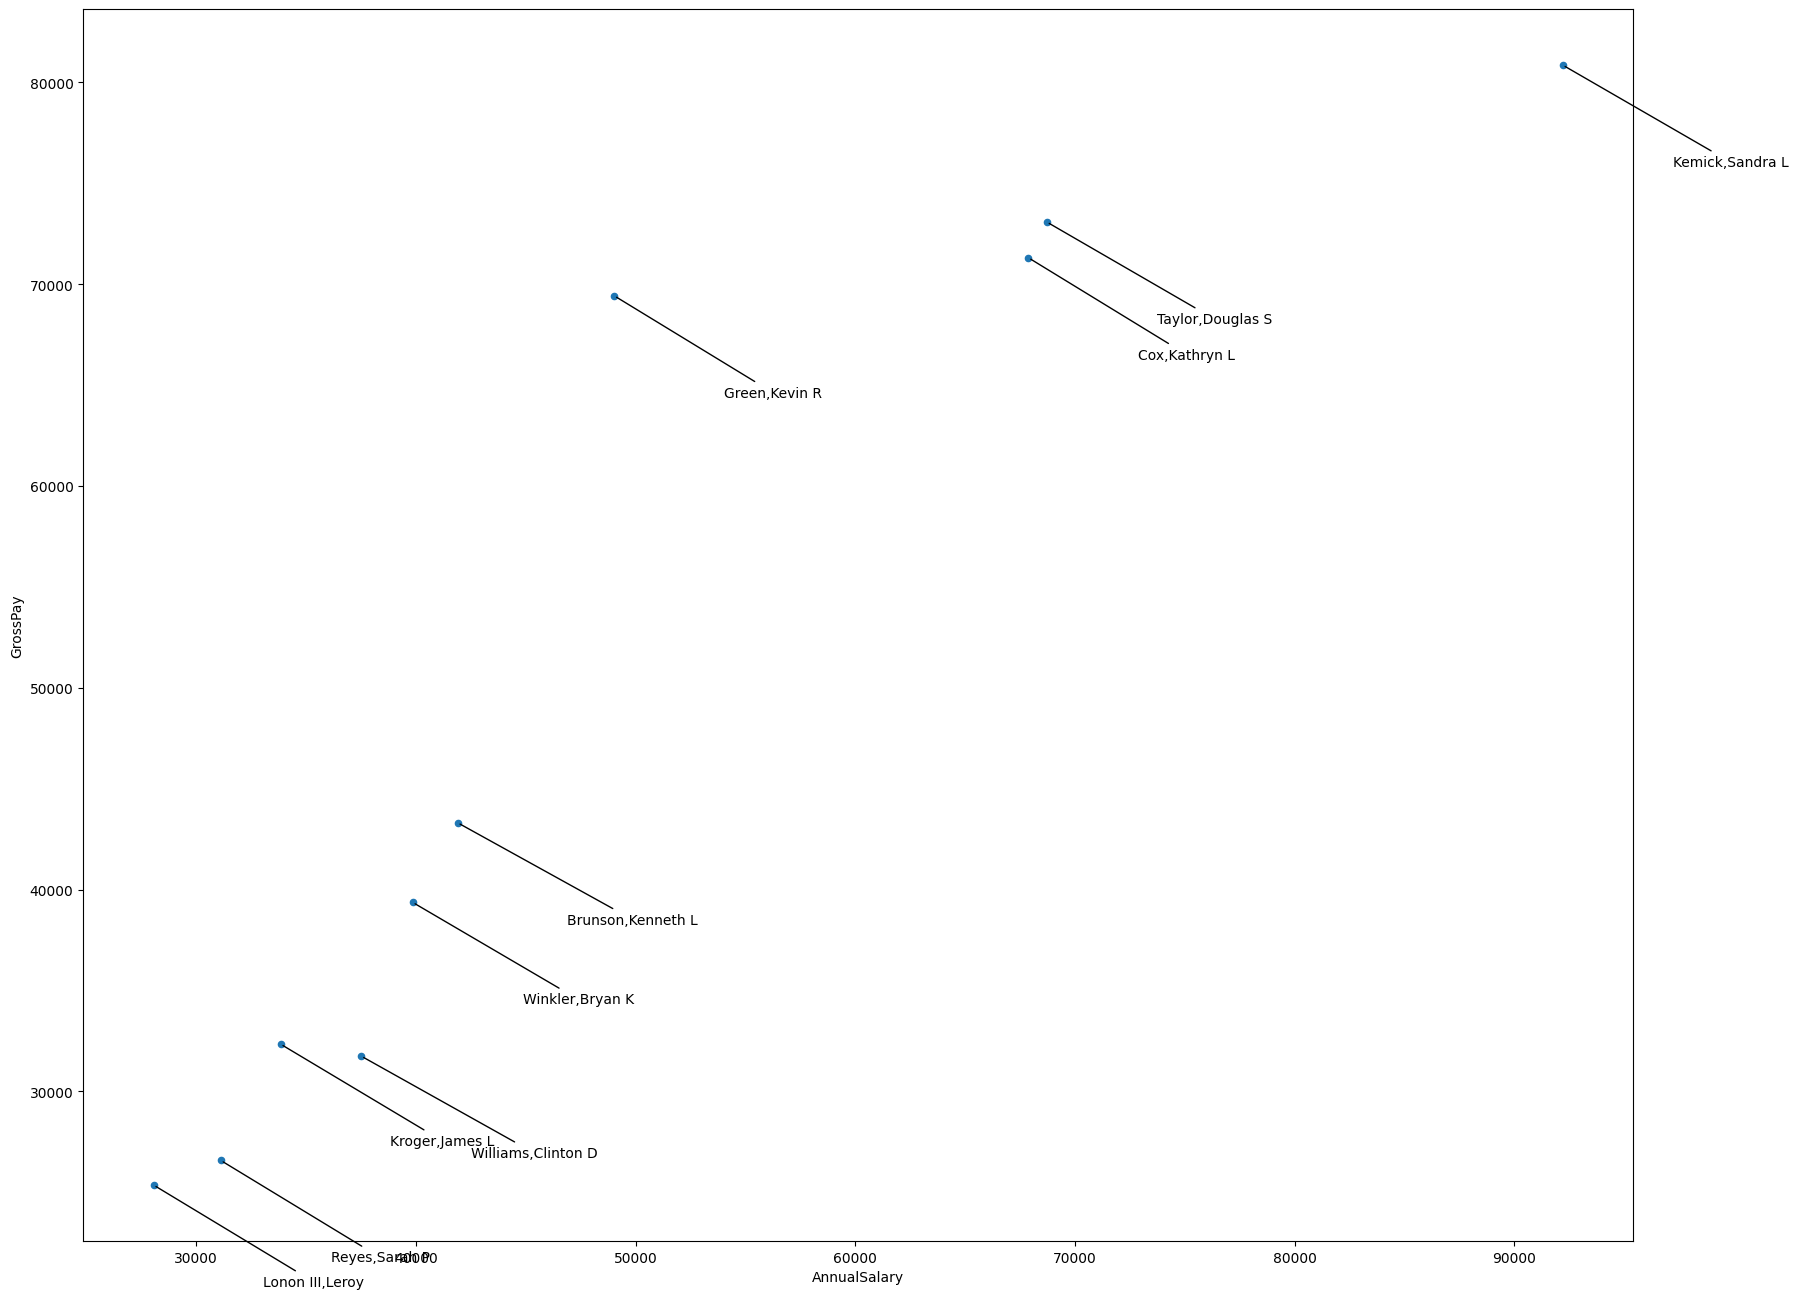

In [13]:
fig, ax = plt.subplots(figsize=(20,16))
tiny_sample.plot.scatter(x='AnnualSalary', y='GrossPay', ax=ax)
for name, details in tiny_sample.iterrows():
    ax.annotate(text=name, xy=(details.AnnualSalary,details.GrossPay), xytext=(details.AnnualSalary+5000, details.GrossPay-5000),
                arrowprops=dict(arrowstyle="-", color='black')
               )

Take that image, and open it in an editing tool that has a ruler tool.

**Windows** You could use *Microsoft Paint* (type "Paint" in the start menu) or *Snipping Tool / Snip & Sketch* (Take a screenshot with Windows + Shift + S and then annotate directly on the captured image.)

**macOS** Preview or Quick Look

The next cell will give you a five random pairs of people to draw a line between. Draw them, and then **save the image into your
github classroom repo so that we know that you've done it**.

In [12]:
for i in range(5):
    pair = tiny_sample.sample(2)
    first_name = pair.index[0]
    second_name = pair.index[1]
    print(f"""
Draw a line that goes through {first_name} and {second_name}.

This should go through ({pair.AnnualSalary.iloc[0]},{pair.GrossPay.iloc[0]}) and ({pair.AnnualSalary.iloc[1]},{pair.GrossPay.iloc[1]})

It has a gradient (slope) of {(pair.GrossPay.iloc[1]-pair.GrossPay.iloc[0])/(pair.AnnualSalary.iloc[1]-pair.AnnualSalary.iloc[0])}

-----------------------------
""")


Draw a line that goes through Taylor,Douglas S and Green,Kevin R. 

This should go through (68717.0,73077.08) and (49027.0,69421.25)

It has a gradient (slope) of 0.1856693753174201

-----------------------------


Draw a line that goes through Green,Kevin R and Reyes,Sarah P. 

This should go through (49027.0,69421.25) and (31119.0,26580.66)

It has a gradient (slope) of 2.3922598838507927

-----------------------------


Draw a line that goes through Cox,Kathryn L and Kemick,Sandra L. 

This should go through (67881.0,71305.6) and (92200.0,80852.61)

It has a gradient (slope) of 0.3925741190016035

-----------------------------


Draw a line that goes through Winkler,Bryan K and Kemick,Sandra L. 

This should go through (39853.0,39367.23) and (92200.0,80852.61)

It has a gradient (slope) of 0.7925073070089976

-----------------------------


Draw a line that goes through Williams,Clinton D and Reyes,Sarah P. 

This should go through (37511.0,31749.83) and (31119.0,26580.66)

It has 

### Get an estimate

Which was the "middle" slope line on your diagram? i.e. what was the median gradient?

(Write it in the next cell so that we know you did it. Note that it's unlikely that two students will get the same answer.)

Answer: 0.914340872955663

### A moment of reflection

Does that mean that Baltimore employees typically get more pay than their salary, or less than their salary?

(Write it in the next cell so that we know you did it. You might or might not have the same answer as your neighbour, but generally you will.)

Answer: 4 employees less than their salary, and one employee more than the salary.


# Data Splitting

We need to have train, validation and test data. (We actually should have done that before we did our manual Theil-Sen algorithm.)

In [14]:
training_data, holdout_data = sklearn.model_selection.train_test_split(salaries, test_size=0.2)
validation_data, test_data = sklearn.model_selection.train_test_split(holdout_data, test_size=0.5)

In [15]:
training_data.shape, validation_data.shape, test_data.shape

((11563, 6), (1445, 6), (1446, 6))

# Scikit Learn Regression

We'll follow the pattern we followed in the code from lectures:

- Construct a Regressor object

- `.fit()` it

- Use it to `.predict()` the validation data

- Look at the coefficients of the model (in this case, the gradient).

### Theil-Sen

You just did a Theil-Sen regression by hand, and we saw one in class. Let's see how close your five-sample version was to a more complete computation.

In [16]:
ts = sklearn.linear_model.TheilSenRegressor()
ts.fit(training_data[['AnnualSalary']], training_data['GrossPay'])
ts_predictions = ts.predict(validation_data[['AnnualSalary']])
ts.coef_

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_theil_sen.py:128: ConvergenceWarning: Maximum number of iterations 300 reached in spatial median for TheilSen regressor.
  warnings.warn(


array([0.98553325])

### RANSAC

Let's use a RANSAC regressor. This was demonstrated in class. (Getting the coefficients for a RANSAC model is a little unusual: you ask for the best estimator, and then you ask for the coefficients of that best estimator.

In [17]:
ransac = sklearn.linear_model.RANSACRegressor()
ransac.fit(training_data[['AnnualSalary']], training_data['GrossPay'])
ransac_predictions = ransac.predict(validation_data[['AnnualSalary']])
ransac.estimator_.coef_

array([1.00852146])

### Huber

One of the best and most robust regressors is the Huber model. Finish off this code.

In [20]:
huber = sklearn.linear_model.HuberRegressor()
huber.fit(training_data[['AnnualSalary']], training_data['GrossPay'])
huber_predictions = huber.predict(validation_data[['AnnualSalary']])
huber.coef_


array([0.91146723])

### Ordinary Least Squares

If you have done STAT1170 you might have encountered this choice for finding a line of best fit through some points.

It is very common and popular, so the scikit learn class is called `LinearRegression()`

Finish off this code:

In [54]:
ols = sklearn.linear_model.LinearRegression()
ols.fit(training_data[['AnnualSalary']], training_data['GrossPay'])
ols_predictions = ols.predict(validation_data[['AnnualSalary']])
ols.coef_


array([1.01673643])

# Evaluating these models

How wrong were the predictions? We can subtract the prediction from the correct answer to look.

In [55]:
validation_data.GrossPay - ts_predictions

,GrossPay
Name,
"Johnson,Peter H",-61.763978
"Peters Jr,Glenn A",10477.050696
"Layne,Asha C",-1089.272453
BPD 8,11316.937726
"Turner,Jacqueline",9718.835682
...,...
"Gierczak,Rebecca D",-15130.011157
"Baumgartner,Jessica L",1518.971504
"Stevenson,Anthony C",-1106.848696


In [56]:
validation_data.GrossPay - ransac_predictions

,GrossPay
Name,
"Johnson,Peter H",-618.529166
"Peters Jr,Glenn A",9251.213683
"Layne,Asha C",-2043.871587
BPD 8,10025.446387
"Turner,Jacqueline",9068.508483
...,...
"Gierczak,Rebecca D",-15521.330204
"Baumgartner,Jessica L",328.950120
"Stevenson,Anthony C",-2201.606941


Now look at the data for your Huber regressor and your Ordinary Least Squares regressor. (Put the calculations into the next two cells.)

In [57]:
validation_data.GrossPay - huber_predictions

,GrossPay
Name,
"Johnson,Peter H",-1712.218091
"Peters Jr,Glenn A",10982.288145
"Layne,Asha C",-1457.939994
BPD 8,12033.707733
"Turner,Jacqueline",8369.830278
...,...
"Gierczak,Rebecca D",-17313.518428
"Baumgartner,Jessica L",1908.814091
"Stevenson,Anthony C",-1023.935702


In [58]:
validation_data.GrossPay - ols_predictions

,GrossPay
Name,
"Johnson,Peter H",-227.572076
"Peters Jr,Glenn A",9403.074056
"Layne,Asha C",-1795.082777
BPD 8,10153.844804
"Turner,Jacqueline",9426.030644
...,...
"Gierczak,Rebecca D",-15071.249971
"Baumgartner,Jessica L",493.609418
"Stevenson,Anthony C",-2002.904806


## Summarising how wrong they were

Ideally, we'd like a number that says which one was the best. But choosing which way we calculate that number is a decision
that reflects what we think is important. These are questions we might ask:

- What's the most inaccurate prediction?

- 99% of the time, the correct answer was within ____ of what we predicted?

- On average, how far away from the right answer were we?


Here's how to get the most inaccurate prediction for the Theil-Sen regressor. (The maximum of the absolute values of the error in our prediction.). In the following cells, do RANSAC, Huber and Ordinary Least Squares

In [25]:
(validation_data.GrossPay - ts_predictions).abs().max()

88729.92996145954

In [26]:
(validation_data.GrossPay - ransac_predictions).abs().max()

92321.20771297463

In [59]:
(validation_data.GrossPay - ols_predictions).abs().max() # the worst performance

93014.65137755766

In [40]:
(validation_data.GrossPay - huber_predictions).abs().max()

80603.44701124591

(If you are ahead of the rest of the prac group and are waiting around idle, you could use `idxmax()` instead of `max()` to find out _which_ employee was most badly mis-predicted.)

------

99% of the predictions were wrong by less than this amount.... (fill in RANSAC, Huber and Ordinary Least Squares)

In [28]:
(validation_data.GrossPay - ts_predictions).abs().quantile(0.99)

42105.53959748205

In [29]:
(validation_data.GrossPay - ransac_predictions).abs().quantile(0.99)

42077.9723949944

In [30]:
(validation_data.GrossPay - huber_predictions).abs().quantile(0.99) # the smallest is bad performance

40947.23457380865

In [60]:
(validation_data.GrossPay - ols_predictions).abs().quantile(0.99)

42011.434936929894

Here's how we could get the mean absolute error (how far we are away from the right answer on average). sklearn has many built-in functions for doing these sorts of calculations. (Fill in RANSAC, Huber and Ordinary Least Squares).

In [32]:
sklearn.metrics.mean_absolute_error(validation_data.GrossPay, ts_predictions)

6410.643589801701

In [33]:
sklearn.metrics.mean_absolute_error(validation_data.GrossPay, ransac_predictions)

6403.087440906204

In [34]:
sklearn.metrics.mean_absolute_error(validation_data.GrossPay, huber_predictions)

6366.45506096992

In [61]:
sklearn.metrics.mean_absolute_error(validation_data.GrossPay, ols_predictions)

6423.039860244817

A very common measure (which you might have encountered in STAT1170 if you've done it) is the $R^2$ measure:

In [36]:
sklearn.metrics.r2_score(validation_data.GrossPay, ts_predictions)

0.7914049848811484

In [37]:
sklearn.metrics.r2_score(validation_data.GrossPay, ransac_predictions)

0.7918645102795319

In [38]:
sklearn.metrics.r2_score(validation_data.GrossPay, huber_predictions)

0.7859107367570852

In [62]:
sklearn.metrics.r2_score(validation_data.GrossPay, ols_predictions)

0.7919310020947115

## Time to choose!

On the basis of the information you chose above, which regressor are you going to choose to use?

Say which model you think is best, and the basis you chose for using it. (While there are some obviously wrong answers you can give here, there are many options for the "right" answer depending on your criteria for best.)

_Answer_: Ransac is the best model

### Evaluating it

You don't want to run `.fit()` again, but you do want to run `.predict()` again, using the model that you chose in the last section,
but this time using the test data. Call the variable that stores those predictions `test_predictions`.

In [70]:
test_predictions = ols.predict(test_data[['AnnualSalary']])

In [81]:
sklearn.metrics.mean_absolute_error(test_data.GrossPay,test_predictions)

6408.0945228870705

Using the measure that you thought was the most important --- the reason you chose that model over the others --- evaluate how good your chosen model is.

i.e. if you thought $R^2$ score was the most important, you would copy that same metric calculation here, comparing `test_data.GrossPay` to `test_predictions`.

In [82]:
sklearn.metrics.r2_score(test_data.GrossPay, test_predictions)

0.7942241631060266

# A completely different analysis

Now imagine that you are the City of Baltimore's hiring manager. New employees regularly ask how much they are actually likely to earn given the salary to which they are about to agree.

You don't want to give an answer that is too high because you might be putting the city at risk for a lawsuit for misrepresenting the job. On the other hand, you don't want to give an answer that's too low because the candidate might pass up on the job and work elsewhere.

You decide that it will cost \\$0.05 in lawsuit risk for each dollar you overrepresent, but only \\$0.01 for each dollar you underrepresent.

E.g., if a candidate is actually likely to earn \\$100,000 and you say \\$120,000, this is worth \\$10,000 in potential lawsuits for misrepresentation. If you say \\$80,000, then that will cost you \$200 in potential recruiters' fees to find someone else.

Here's a function that will calculate the cost of these predictions. Don't worry if it is too complicated for you to create
by yourself right now, but see if you can make sense of how it works

In [75]:
def cost(actuals, predictions):
    cost = 0.0
    for actual,prediction in zip(actuals, predictions):
        if prediction > actual:
            cost += 0.05 * (prediction - actual)
        elif prediction < actual:
            cost += 0.01 * (actual - prediction)
        else:
            cost += 0.0
    return cost

Here's how you would use it for the Theil-Sen predictions. Use it to calculate the cost of the RANSAC, Huber and Ordinary Least Squares Regressors.

In [76]:
cost(validation_data['GrossPay'], ts_predictions)

260927.64677766085

In [77]:
cost(validation_data['GrossPay'], ransac_predictions)

288665.89176035917

In [78]:
cost(validation_data['GrossPay'], huber_predictions)

268126.84876523045

In [79]:
cost(validation_data['GrossPay'], ols_predictions)

282511.6089569834

Based on this, which of the models we created today model would be the best one to use for answering new employees' questions?

_Answer:_ ts_predictions is the best one.


# Very much optional, super-hard question

If you are already familiar with Python programming, calculus or other data science concepts, try to find the optimal coefficients of a linear regression model which would minimise the hiring manager's regret.